In [1]:
import pandas as pd 
import numpy as np

In [2]:
df_compensation=pd.read_csv("employee_compensation.csv")

In [3]:
df_compensation.head(2)

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.2,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.0,442.03,141.59,583.62,2398.23


In [4]:
df_compensation.shape

(50000, 12)

In [12]:
df_compensation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Type            50000 non-null  object 
 1   Year                 50000 non-null  object 
 2   Employee_Identifier  50000 non-null  int64  
 3   Salaries             50000 non-null  float64
 4   Overtime             50000 non-null  float64
 5   Other_Salaries       50000 non-null  float64
 6   Total_Salary         50000 non-null  float64
 7   Retirement           50000 non-null  float64
 8   Health/Dental        50000 non-null  float64
 9   Other_Benefits       50000 non-null  float64
 10  Total_Benefits       50000 non-null  float64
 11  Total_Compensation   50000 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 4.6+ MB


In [11]:
df_compensation.Year=df_compensation.Year.astype(object)

In [13]:
df_compensation.drop('Employee_Identifier',axis=1,inplace=True)

In [14]:
df_compensation.head(2)

,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,92288.22,267.45,267.45,92823.12,20700.2,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,1466.38,348.23,0.00,1814.61,0.0,442.03,141.59,583.62,2398.23


In [16]:
import matplotlib.pyplot as plt

<AxesSubplot:>

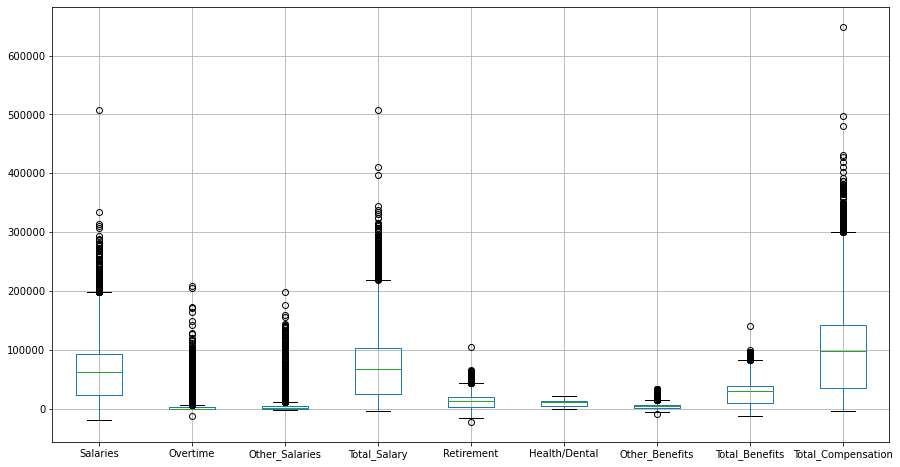

In [18]:
plt.figure(figsize = (15,8))
df_compensation.boxplot()

In [19]:
q1=df_compensation.quantile(0.25)
q3=df_compensation.quantile(0.75)

In [22]:
IQR=q3-q1
IQR

Salaries               69684.4675
Overtime                2648.8825
Other_Salaries          4477.0300
Total_Salary           77639.6025
Retirement             16021.0300
Health/Dental           8533.8300
Other_Benefits          5265.5550
Total_Benefits         29138.1000
Total_Compensation    106000.4400
dtype: float64

In [28]:
removeBelowQ1=df_compensation<(q1-1.5*IQR)
removeBelowQ3=df_compensation>(q3+1.5*IQR)
df_compensation=df_compensation[~(removeBelowQ1|removeBelowQ3).any(axis=1)]

In [29]:
df_compensation.duplicated()

0        False
1        False
3        False
4        False
5        False
         ...  
49994    False
49996    False
49997    False
49998    False
49999    False
Length: 37721, dtype: bool

In [33]:
df_compensation.iloc[:, 2:]=df_compensation.iloc[:, 2:].apply(lambda rec: (rec-rec.mean())/rec.std())
df_compensation.head()

C:\Users\skv\anaconda3\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,Year_Type,Year,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,0.983488,-0.228091,-0.474919,0.926912,1.178494,0.916565,1.145315,1.160922,1.001727
1,Calendar,2015,-1.252266,-0.167552,-0.587276,-1.263215,-1.180529,-1.491462,-1.259970,-1.365191,-1.304472
3,Fiscal,2014,-0.164358,-0.428525,0.095551,-0.168961,-0.031662,-1.579733,-0.037039,-0.521484,-0.269306
4,Fiscal,2013,-0.258589,-0.428525,-0.587276,-0.300194,-0.312417,-0.399832,-0.256852,-0.347973,-0.316586
5,Calendar,2013,0.536538,-0.428525,0.019113,0.511845,0.511937,0.994002,0.703228,0.731784,0.578543


In [34]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(df_compensation['Total_Benefits'],
                                               df_compensation['Total_Compensation'],
                                               random_state=1,
                                              test_size=0.3)

In [38]:
x_train=pd.DataFrame(x_train)
c=np.ones(x_train.shape[0])

In [40]:
x_train.insert(loc=0,column='intercept',value=c)

In [41]:
x_train.head(2)

,intercept,Total_Benefits
7580,1.0,0.354816
15923,1.0,1.316932


In [49]:
y_train

7580     0.190135
15923    1.437448
5380     0.090103
9580    -0.553913
3690    -1.292305
           ...   
10391    1.736581
43031   -0.400736
6909     0.609451
16191    0.032377
43708    0.369029
Name: Total_Compensation, Length: 26404, dtype: float64

In [46]:
from statsmodels.formula.api import ols
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [51]:
SLR_model=sm.OLS(y_train,x_train).fit()
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Compensation   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 4.729e+05
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        08:46:19   Log-Likelihood:                 1460.8
No. Observations:               26404   AIC:                            -2918.
Df Residuals:                   26402   BIC:                            -2901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -0.0002      0.001     -0.

In [52]:
y_train_predicted=SLR_model.predict(x_train)
y_train_predicted.head(2)

7580     0.345104
15923    1.281337
dtype: float64

In [63]:
ssr=np.sum(np.power(y_train_predicted-y_train.mean(),2))
ssr

24792.319612330186

In [64]:
sse=np.sum(np.power((y_train-y_train_predicted),2))
sse

1384.010118201885

In [56]:
SLR_model.rsquared

0.9471274188379597

In [61]:
r_sq=ssr/sst
r_sq

17.913394769498165